In [1]:
import sklearn

In [2]:
# Neural Network classification with Pytorch 

# 1. data preparation

from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                     noise=0.03, random_state=42)


In [3]:
len(X), len(y)

print(f'first 5 samples of X:\n {X[:5]}')
print(f'first 5 samples of y:\n {y[:5]}')

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y:
 [1 1 1 1 0]


In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# Make data frame
import pandas as pd

circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

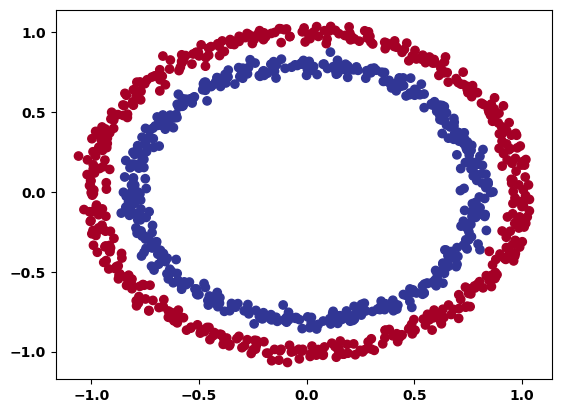

In [7]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0], 
            y= X[:,1],
            c= y,
            cmap=plt.cm.RdYlBu)

In [8]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# view the first example of features and labels
X[0], y[0]
print(f'first example of features: {X[0]} and the same for y: {y[0]}')
print(f'Shapes for one sample of X: {X[0].shape} and y: {y[0].shape}')

first example of features: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and y: ()


In [10]:
# Turn the data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)  # X = torch.tensor(X, dtype=torch.float32)  
y = torch.from_numpy(y).type(torch.float)


In [11]:
X.shape, y.shape, X[:5]
type(X), X.dtype

(torch.Tensor, torch.float32)

In [12]:

# splitting data : training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, # 0.2 = 20% test sample
                                                    random_state=42)

### Alternatively --> split the data manually

# split_data = int(len(X) * 0.8 )
# X_train, X_test = X[:split_data], X[split_data:]
# y_train, y_test = y[:split_data], y[split_data:]


len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

### Building a model
 lets build a model to classify our blue and red dots
 1. setup device agnostic code
 2. construct a model 
 3. define a loss function and optimizer
 4. create a training loop and test loop

In [13]:
import torch 
import torch.nn as nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [15]:
### 
# 1. subclasses `nn.Module` 
# 2. create 2 `nn.Linear` layers
# 3. define a `forward` method
# 4. define a `__init__` method -- instantiate of our model



In [16]:
# construct a model that subclasses `nn.Module`
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create 2 `nn.Linear` layers
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # outputs 1 feature- same shape as y
    # 3.  define a forward method
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

# 4. instantiate the model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
### check TensorFlow as well
## google search for : 'tensorflow playground'



In [17]:
### let replicate above model with nn.Sequential()
## which is operate exacly the same as CircleModelV0()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2069,  0.5511],
                      [ 0.6158,  0.5655],
                      [ 0.5528, -0.6599],
                      [-0.2562, -0.4716],
                      [-0.3441, -0.5276]])),
             ('0.bias', tensor([ 0.2695, -0.4556,  0.4696, -0.4082,  0.0882])),
             ('1.weight',
              tensor([[ 0.1397, -0.3289,  0.1502,  0.1233, -0.3964]])),
             ('1.bias', tensor([-0.0793]))])

In [19]:
## Make some predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f'Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, shape: {X_test.shape}')
print(f'\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels: \n{y_test[:10]}')

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
### set up loss function and optimizer
### for regression one may use MAE or MSE
### for classification one might binary cross entropy or categorical cross entropy
#### And for optimizer there 2 most common: SGD and Adam
# for loss function we are going to use binary cross entropy



In [22]:
# print(f'Length of predictions: {len(y_pred)}, shape: {y_pred.shape}')
# print(f'Length of test samples: {len(X_test)}, shape: {X_test.shape}')
# print(f'\nFirst 10 predictions: \n{y_pred[:10]}')
# print(f'\nFirst 10 labels: \n{y_test[:10]}')

In [20]:
### Setup loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()   # Numerically is more stable than using a plain Sigmoid followed by BCELoss
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [22]:
### calculate accuracy

def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item() # or torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc


In [25]:
# Training the model 
# 1. forward pass
# 2. calculate the loss
# 3. optimizer zero grad
# 4. loss backward
# 5. optimizer step (gradient descent)

In [26]:
#### going from raw logits -> prediction probabilities -> prediction labels
## our model outputs are going to be raw logits
### we can convert these logits into pred_probs
## by passing them to some activation function (e.g. sigmoid for binary classification and softmax for multi-class classification)

## then we can convert our model's prediction probabilities into prediction labels by
# either rounding them or taking the argmax (for multi-class) or rounding (for binary)


In [23]:
### view the first outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[0.0492],
        [0.0389],
        [0.1015],
        [0.0343],
        [0.1417]])

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [25]:
### use the sigmoid act func on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5123],
        [0.5097],
        [0.5253],
        [0.5086],
        [0.5354]])

In [28]:
## For our pred-probs values, we need to perform a range-style rounding on them:
# `y_pred_probs` >= 0.5 , y = 1 (class 1)
# `y_pred_probs` < 0.5 , y = 0 (class 0)


# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full 
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

# check for equality 
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimensions
y_preds = y_preds.squeeze()



tensor([True, True, True, True, True])


In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
## Building a training and testing loop
torch.manual_seed(42)

# Set the number of epochs
epochs = 101

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # turn logit -> pred probs -> pred labels


    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,   ### BCEWithLogitsLoss()
                   y_train)
    acc = accuracy_fn(y_true= y_train,
                      y_pred=y_pred)
    # 3. Optimizer sero grad
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. optimizer step
    optimizer.step() 

    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        ### Print out what's happening

        if epoch % 10 ==0:
            print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc:  {acc: .2f} | , Test acc: {test_acc: .2f}%')







Epoch: 0 | Loss: 0.69471, Acc:   50.00 | , Test acc:  50.00%
Epoch: 10 | Loss: 0.69372, Acc:   50.00 | , Test acc:  50.00%
Epoch: 20 | Loss: 0.69333, Acc:   50.00 | , Test acc:  50.00%
Epoch: 30 | Loss: 0.69316, Acc:   58.13 | , Test acc:  54.00%
Epoch: 40 | Loss: 0.69309, Acc:   52.62 | , Test acc:  47.50%
Epoch: 50 | Loss: 0.69305, Acc:   51.50 | , Test acc:  47.00%
Epoch: 60 | Loss: 0.69302, Acc:   51.25 | , Test acc:  47.50%
Epoch: 70 | Loss: 0.69301, Acc:   50.88 | , Test acc:  47.00%
Epoch: 80 | Loss: 0.69300, Acc:   50.75 | , Test acc:  46.00%
Epoch: 90 | Loss: 0.69299, Acc:   51.12 | , Test acc:  46.00%
Epoch: 100 | Loss: 0.69299, Acc:   50.88 | , Test acc:  46.00%


In [31]:
### 4. Make predictions and evaluate the model

## it looks like our model isnt learning anythings!
# to inspect, lets make some predictions and make the visualize

# to do so we're to import a func named `plot_descision_boundary()`
### we import it prom its path

In [32]:
import requests
from pathlib import Path
## Download helper funcs from LearnPytTorch repo (if it's aleardy doesnt exist)
if Path("helper_functions.py").is_file():
    print('helper_functions.py aleardy exists')
else: 
    print('Downloading helper_functions.py')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)




helper_functions.py aleardy exists


In [33]:
from helper_functions import  plot_predictions, plot_decision_boundary

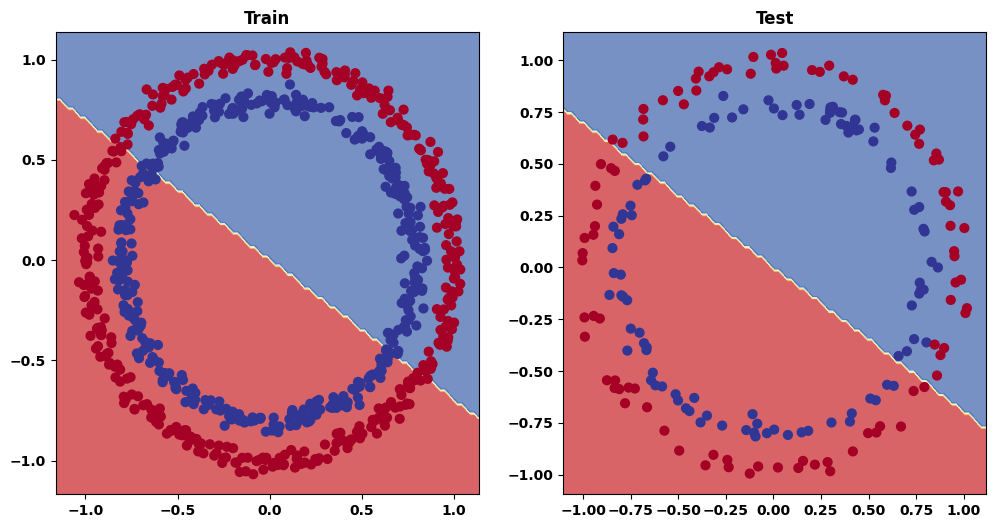

In [34]:
### plot descionboundary of the model
import numpy as np
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)   # num rows, num cols, index
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
## 5. Improving our model
# Add more layers - give the model more chances to learn about the patterns in the data
# Add more hidden units - go from 5 hidden units to 10 hidden units
# Fit for more epochs
# changing the activation function
# changing the learning rate
# changing the loss function

# These options are all from model's perspective because deal with model rather than data
### they all refered as ** hyperparameters **

# Lets try and imporove our model by:
# 1. Adding more hidden units: 5 -> 10 
# 2. Adding more layers: 2 -> 3
# 3. increase the number of epochs: 100 -> 1000

2.9.0+cpu
0.24.0+cpu


In [44]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [42]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)


    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x   # 

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
# Creat a loss function 
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer

optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [44]:
# write a training and evaluation loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# train for longer
epochs = 1001

# put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ## training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> pred_probs -> pred labels
    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                       y_pred=y_pred)

    # 3. Optimize zero gradients

    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimize the model
    optimizer.step()

    # 6. Testing
    model_1.eval()


    ## evaluation
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate the loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
# Print out the results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Train Acc: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Train Loss: 0.6940 | Train Acc: 50.8750 | Test Loss: 0.6943 | Test Acc: 50.00%
Epoch: 100 | Train Loss: 0.6930 | Train Acc: 51.1250 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 200 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 300 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 400 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 500 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 600 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 700 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 800 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 900 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 1000 | Train Loss: 0.6930 | Train Acc: 51.0000 | Test Loss: 0.6947 | Test A

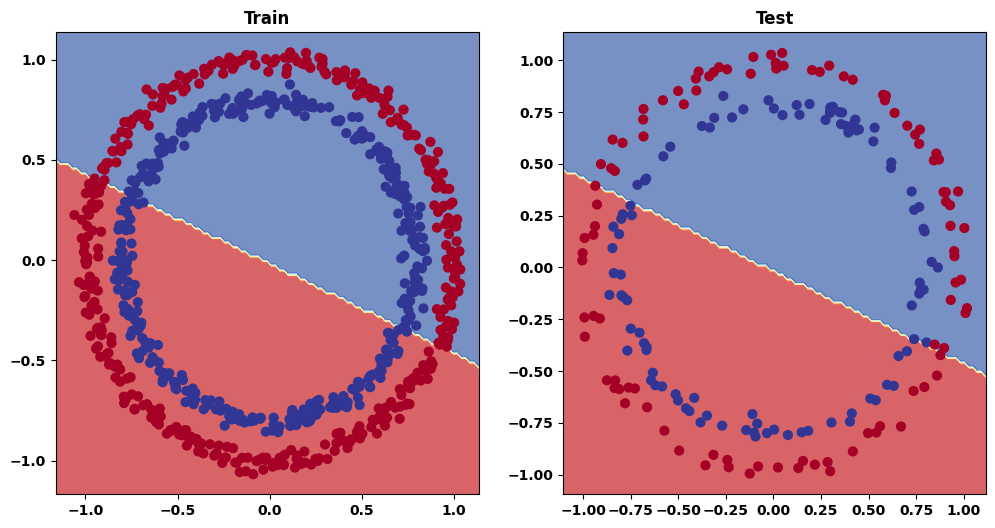

In [45]:
# plot the decision boundary

### plot descionboundary of the model
import numpy as np
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)   # num rows, num cols, index
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

In [46]:
#  preparing data to see if our model can fit a straight line!
# lets make a smaller data set

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data 
X_regression = torch.arange(start, end, step) .unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
# create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

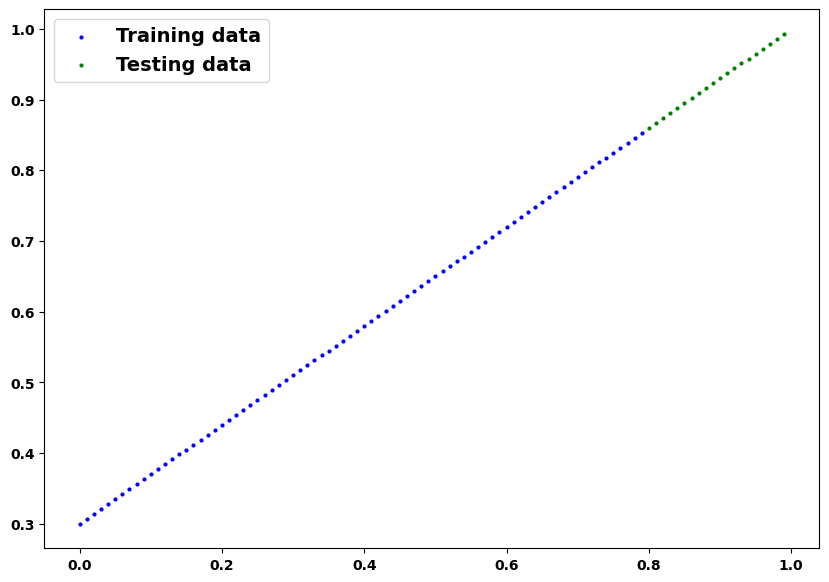

In [47]:
from helper_functions import plot_predictions
plot_predictions(train_data= X_train_regression, 
                 train_labels= y_train_regression, 
                 test_data= X_test_regression, 
                 test_labels= y_test_regression)

In [64]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

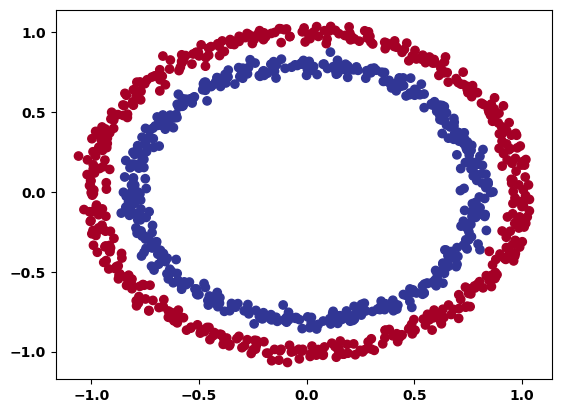

In [31]:
### Non-Linearity

### Recreating non-linear data (red and blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, 
                    noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [32]:
## convert data to tensor and them train and test aplits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)   #   once it applied, second run give rise to error
y = torch.from_numpy(y).type(torch.float)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2, random_state=42)
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [33]:
X_train[:5], y_train[:5]    

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [48]:
## Building a model with non-linearity
## build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()   # relu is a non-linear activation function

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x
    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [49]:
## setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                             lr=0.1)



In [ ]:
### Traing a model with non-linearity
## RANDOM SEED
torch.manual_seed(42)
torch.cuda.manual_seed(42)  

### put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Training loop

epochs = 1001

for epoch in range(epochs): 
    ### Training 
    model_3.train()

    # Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred prob ->pred labels

    # 2.Calculate the loss
    loss = loss_fn(y_logits, y_train)  # BCEwithLogitsLoss- takes in logits as first input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    #### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)    
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

## print out what's this happing
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.5682, Acc: 87.75% | Test Loss: 0.5738, Test Accuracy: 86.50%


In [27]:
# model_3.state_dict()

In [51]:
## Visualize considering model with non-linear activation func
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

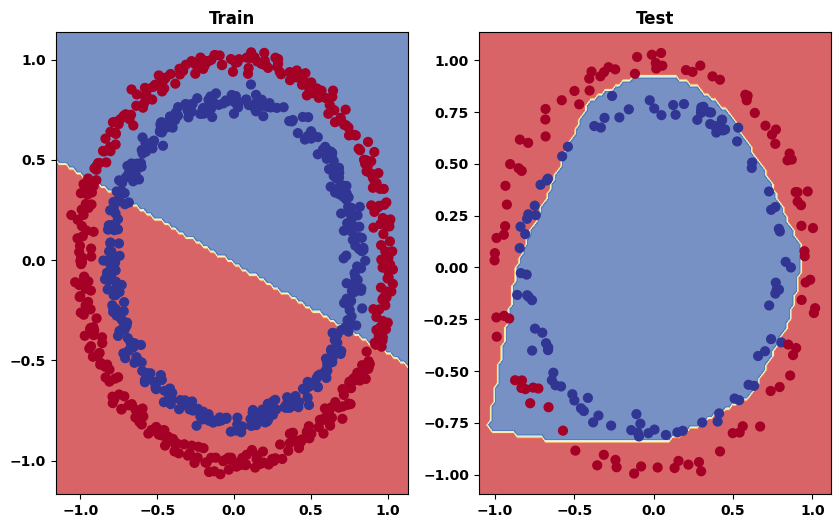

In [53]:
from helper_functions import  plot_predictions, plot_decision_boundary
# plot desicion boundary
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)  # model_1 = non non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
##  replicating non-linear activation function

In [60]:
### Create a tensor
A = torch.arange(-10, 10, 1 , dtype= torch.float32 )
A.dtype
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

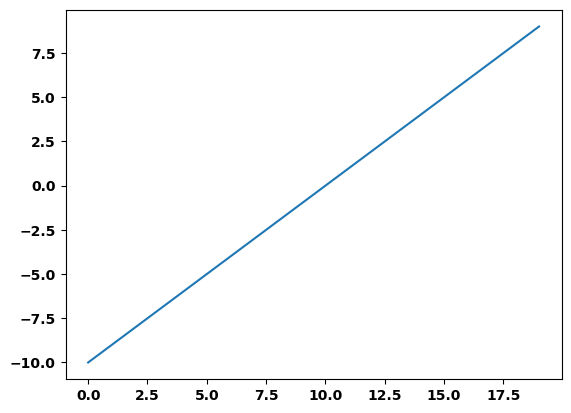

In [58]:
### Visualize the tensor
plt.plot(A)

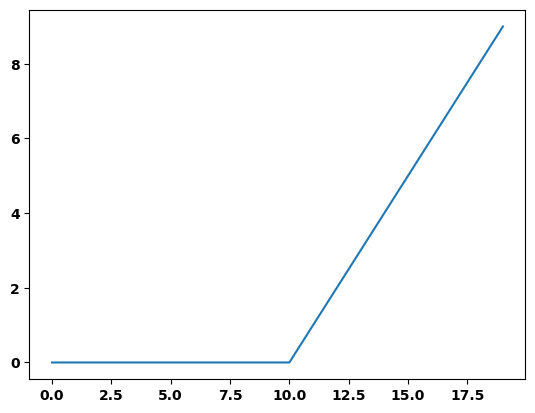

In [62]:
# perform Relu on this
B = torch.relu(A)
plt.plot(B)

In [ ]:
# defining a relu function
def relu(x: torch.tensor) -> torch.tensor:    ## input must be a tensor -> return tensor too
    return torch.maximum(x, torch.tensor(0.0))

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

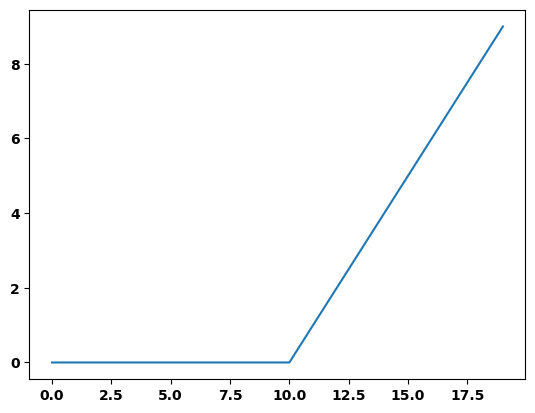

In [66]:
## plot relu activation function
plt.plot(relu(A))

In [67]:
## How about another activation function: Sigmoid

def sigmoid(x:torch.Tensor)-> torch.Tensor:
    return 1/(1+torch.exp(-x))

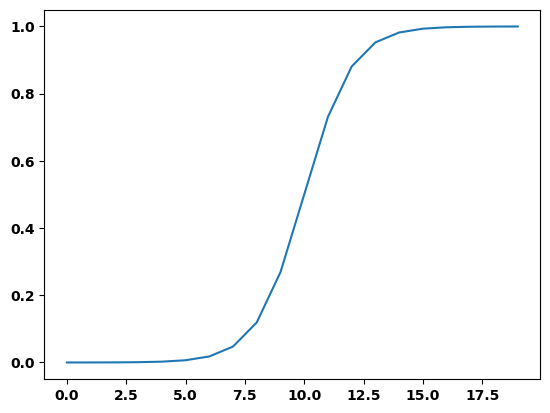

In [ ]:
### visualize data with sigmoid
plt.plot(sigmoid(A))   ### similar to torch.sigmoid(A)